# Linear Regression on House Prices (1D) with Keras

In this notebook we show how to perform linear regression on house prices data, using Keras.

## Define `X_train` and `Y_train`

In [74]:
import pandas as pd
import numpy as np
from numpy import transpose
from numpy import append
from numpy import reshape
import matplotlib.pyplot as plt
# %matplotlib notebook
import seaborn as sns

np.random.seed(42)
# tf.random.set_seed(42)
pd.set_option('display.max_columns', 100)

In [75]:
data = pd.read_csv('sources/train.csv')

data = data.select_dtypes(exclude=['object'])
data.drop('Id',axis = 1, inplace = True)
data.fillna(0, inplace=True)

In [88]:
# Suppression des outliers
remove_outliers = True
if remove_outliers:
    from sklearn.ensemble import IsolationForest

    clf = IsolationForest(max_samples = 100, random_state = 42)
    clf.fit(data)
    y_noano = clf.predict(data)
    y_noano = pd.DataFrame(y_noano, columns = ['Top'])
    y_noano[y_noano['Top'] == 1].index.values

    data = data.iloc[y_noano[y_noano['Top'] == 1].index.values]
    data.reset_index(drop = True, inplace = True)
    print("Number of Outliers:", y_noano[y_noano['Top'] == -1].shape[0])
    print("Number of rows without outliers:", data.shape[0])

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


Number of Outliers: 132
Number of rows without outliers: 1182


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [77]:
# On insère les données dons des arrays Numpuy
Y_train = data.SalePrice.values.astype(int)
data.drop('SalePrice',axis = 1, inplace = True)

X_train = np.matrix(data)

print(f"X train {X_train.shape}")
print(f"Y train {Y_train.shape}")

X train (1314, 36)
Y train (1314,)


## Model Sequential avec Keras
Define input layer. Number of neurons = number of features in `x`.

Define output layer, with 1 neuron.
`Dense` creates _fully-connected_ layer.

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
model = Sequential()
model = Sequential([
    Input(shape=X_train.shape[1:]),
    Dense(1)
])

### Scale features

"Normalizing" the data should help prevent values from "exploding":

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

## Set up optimizer and "compile" model
In Keras, optimizer is specified when "compiling" model.
(Last step to fix model training code!)

In [80]:
from tensorflow.keras.optimizers import SGD
loss="mse"
LEARNING_RATE = 0.001
model.compile(loss=loss, optimizer=SGD(lr=LEARNING_RATE))

## Fit model (i.e. run optimization)

The model still hasn't "seen" any data yet...

* With SGD we can choose the amount of data to be used to compute the loss function (`BATCH_SIZE`). This can be useful when the whole dataset doesn't fit in memory. We'll revisit this later!
* We need to choose for how many iterations to run SGD (`EPOCHS`).
* The `fit` method is a loop over epochs and batches!

In [81]:
BATCH_SIZE = X_train.shape[0] # computing the loss over the whole dataset
EPOCHS = 2000 # how many iterations over the whole dataset
history = model.fit(X_train, Y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)

Train on 1314 samples
Epoch 1/2000
1314/1314 [==============================] - 0s 115us/sample - loss: 34765582336.0000
Epoch 2/2000
1314/1314 [==============================] - 0s 1us/sample - loss: 34555379712.0000
Epoch 3/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 34347909120.0000
Epoch 4/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 34143135744.0000
Epoch 5/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 33941004288.0000
Epoch 6/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 33741432832.0000
Epoch 7/2000
1314/1314 [==============================] - 0s 3us/sample - loss: 33544384512.0000
Epoch 8/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 33349797888.0000
Epoch 9/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 33157613568.0000
Epoch 10/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 32967794688.0000
Epoch

Epoch 85/2000
1314/1314 [==============================] - 0s 1us/sample - loss: 22970843136.0000
Epoch 86/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 22873178112.0000
Epoch 87/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 22776109056.0000
Epoch 88/2000
1314/1314 [==============================] - 0s 1us/sample - loss: 22679631872.0000
Epoch 89/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 22583736320.0000
Epoch 90/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 22488418304.0000
Epoch 91/2000
1314/1314 [==============================] - 0s 3us/sample - loss: 22393673728.0000
Epoch 92/2000
1314/1314 [==============================] - 0s 3us/sample - loss: 22299488256.0000
Epoch 93/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 22205855744.0000
Epoch 94/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 22112772096.0000
Epoch 95/2000
1314/1

Epoch 168/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 16409113600.0000
Epoch 169/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 16344843264.0000
Epoch 170/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 16280854528.0000
Epoch 171/2000
1314/1314 [==============================] - 0s 4us/sample - loss: 16217144320.0000
Epoch 172/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 16153709568.0000
Epoch 173/2000
1314/1314 [==============================] - 0s 3us/sample - loss: 16090555392.0000
Epoch 174/2000
1314/1314 [==============================] - 0s 1us/sample - loss: 16027670528.0000
Epoch 175/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 15965061120.0000
Epoch 176/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 15902723072.0000
Epoch 177/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 15840652288.0000
Epoch 178/

Epoch 251/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 11902062592.0000
Epoch 252/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 11856642048.0000
Epoch 253/2000
1314/1314 [==============================] - 0s 1us/sample - loss: 11811407872.0000
Epoch 254/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 11766355968.0000
Epoch 255/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 11721485312.0000
Epoch 256/2000
1314/1314 [==============================] - 0s 1us/sample - loss: 11676800000.0000
Epoch 257/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 11632292864.0000
Epoch 258/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 11587966976.0000
Epoch 259/2000
1314/1314 [==============================] - 0s 1us/sample - loss: 11543820288.0000
Epoch 260/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 11499853824.0000
Epoch 261/

Epoch 335/2000
1314/1314 [==============================] - 0s 3us/sample - loss: 8660694016.0000
Epoch 336/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 8628330496.0000
Epoch 337/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 8596097024.0000
Epoch 338/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 8563990016.0000
Epoch 339/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 8532016128.0000
Epoch 340/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 8500167168.0000
Epoch 341/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 8468448256.0000
Epoch 342/2000
1314/1314 [==============================] - 0s 1us/sample - loss: 8436853760.0000
Epoch 343/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 8405386240.0000
Epoch 344/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 8374046208.0000
Epoch 345/2000
1314/

Epoch 419/2000
1314/1314 [==============================] - 0s 1us/sample - loss: 6348013056.0000
Epoch 420/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 6324899328.0000
Epoch 421/2000
1314/1314 [==============================] - 0s 1us/sample - loss: 6301879296.0000
Epoch 422/2000
1314/1314 [==============================] - 0s 3us/sample - loss: 6278951936.0000
Epoch 423/2000
1314/1314 [==============================] - 0s 1us/sample - loss: 6256115712.0000
Epoch 424/2000
1314/1314 [==============================] - 0s 1us/sample - loss: 6233368576.0000
Epoch 425/2000
1314/1314 [==============================] - 0s 3us/sample - loss: 6210714624.0000
Epoch 426/2000
1314/1314 [==============================] - 0s 1us/sample - loss: 6188151296.0000
Epoch 427/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 6165676544.0000
Epoch 428/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 6143292928.0000
Epoch 429/2000
1314/

Epoch 503/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 4695840768.0000
Epoch 504/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 4679324160.0000
Epoch 505/2000
1314/1314 [==============================] - 0s 3us/sample - loss: 4662873088.0000
Epoch 506/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 4646487552.0000
Epoch 507/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 4630169088.0000
Epoch 508/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 4613914624.0000
Epoch 509/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 4597725184.0000
Epoch 510/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 4581600256.0000
Epoch 511/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 4565539328.0000
Epoch 512/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 4549543936.0000
Epoch 513/2000
1314/

Epoch 587/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 3514968064.0000
Epoch 588/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 3503160320.0000
Epoch 589/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 3491400192.0000
Epoch 590/2000
1314/1314 [==============================] - 0s 3us/sample - loss: 3479686656.0000
Epoch 591/2000
1314/1314 [==============================] - 0s 3us/sample - loss: 3468019200.0000
Epoch 592/2000
1314/1314 [==============================] - 0s 3us/sample - loss: 3456399872.0000
Epoch 593/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 3444825600.0000
Epoch 594/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 3433298432.0000
Epoch 595/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 3421815808.0000
Epoch 596/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 3410380032.0000
Epoch 597/2000
1314/

Epoch 671/2000
1314/1314 [==============================] - 0s 1us/sample - loss: 2670643968.0000
Epoch 672/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 2662200576.0000
Epoch 673/2000
1314/1314 [==============================] - 0s 3us/sample - loss: 2653789952.0000
Epoch 674/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 2645413120.0000
Epoch 675/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 2637070080.0000
Epoch 676/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 2628759808.0000
Epoch 677/2000
1314/1314 [==============================] - 0s 3us/sample - loss: 2620483072.0000
Epoch 678/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 2612238848.0000
Epoch 679/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 2604027904.0000
Epoch 680/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 2595849472.0000
Epoch 681/2000
1314/

Epoch 755/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 2066728192.0000
Epoch 756/2000
1314/1314 [==============================] - 0s 3us/sample - loss: 2060687488.0000
Epoch 757/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 2054671104.0000
Epoch 758/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 2048678272.0000
Epoch 759/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 2042708480.0000
Epoch 760/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 2036763136.0000
Epoch 761/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 2030841088.0000
Epoch 762/2000
1314/1314 [==============================] - 0s 3us/sample - loss: 2024942848.0000
Epoch 763/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 2019068800.0000
Epoch 764/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 2013216384.0000
Epoch 765/2000
1314/

Epoch 839/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 1634576640.0000
Epoch 840/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 1630252544.0000
Epoch 841/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 1625945472.0000
Epoch 842/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 1621655808.0000
Epoch 843/2000
1314/1314 [==============================] - 0s 1us/sample - loss: 1617383040.0000
Epoch 844/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 1613127424.0000
Epoch 845/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 1608888192.0000
Epoch 846/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 1604666368.0000
Epoch 847/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 1600461312.0000
Epoch 848/2000
1314/1314 [==============================] - 0s 3us/sample - loss: 1596273280.0000
Epoch 849/2000
1314/

Epoch 923/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 1325171840.0000
Epoch 924/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 1322075136.0000
Epoch 925/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 1318991360.0000
Epoch 926/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 1315919488.0000
Epoch 927/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 1312859904.0000
Epoch 928/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 1309811840.0000
Epoch 929/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 1306776448.0000
Epoch 930/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 1303752832.0000
Epoch 931/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 1300740864.0000
Epoch 932/2000
1314/1314 [==============================] - 0s 3us/sample - loss: 1297741440.0000
Epoch 933/2000
1314/

Epoch 1007/2000
1314/1314 [==============================] - 0s 1us/sample - loss: 1103508480.0000
Epoch 1008/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 1101288576.0000
Epoch 1009/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 1099077376.0000
Epoch 1010/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 1096875648.0000
Epoch 1011/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 1094681984.0000
Epoch 1012/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 1092497280.0000
Epoch 1013/2000
1314/1314 [==============================] - 0s 1us/sample - loss: 1090321280.0000
Epoch 1014/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 1088153984.0000
Epoch 1015/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 1085994880.0000
Epoch 1016/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 1083844864.0000
Epoch 1017

1314/1314 [==============================] - 0s 2us/sample - loss: 946178432.0000
Epoch 1091/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 944580160.0000
Epoch 1092/2000
1314/1314 [==============================] - 0s 1us/sample - loss: 942988224.0000
Epoch 1093/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 941402496.0000
Epoch 1094/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 939823168.0000
Epoch 1095/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 938249856.0000
Epoch 1096/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 936682688.0000
Epoch 1097/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 935121792.0000
Epoch 1098/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 933567104.0000
Epoch 1099/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 932018560.0000
Epoch 1100/2000
1314/1314 [=========

Epoch 1174/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 831665344.0000
Epoch 1175/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 830517248.0000
Epoch 1176/2000
1314/1314 [==============================] - 0s 3us/sample - loss: 829373568.0000
Epoch 1177/2000
1314/1314 [==============================] - 0s 3us/sample - loss: 828234816.0000
Epoch 1178/2000
1314/1314 [==============================] - 0s 3us/sample - loss: 827100288.0000
Epoch 1179/2000
1314/1314 [==============================] - 0s 3us/sample - loss: 825970432.0000
Epoch 1180/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 824844544.0000
Epoch 1181/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 823723520.0000
Epoch 1182/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 822606912.0000
Epoch 1183/2000
1314/1314 [==============================] - 0s 3us/sample - loss: 821494464.0000
Epoch 1184/2000
1314

Epoch 1258/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 749377024.0000
Epoch 1259/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 748551488.0000
Epoch 1260/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 747729216.0000
Epoch 1261/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 746910144.0000
Epoch 1262/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 746094464.0000
Epoch 1263/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 745281856.0000
Epoch 1264/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 744472192.0000
Epoch 1265/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 743666112.0000
Epoch 1266/2000
1314/1314 [==============================] - 0s 1us/sample - loss: 742862656.0000
Epoch 1267/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 742062784.0000
Epoch 1268/2000
1314

Epoch 1342/2000
1314/1314 [==============================] - 0s 3us/sample - loss: 690151680.0000
Epoch 1343/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 689556928.0000
Epoch 1344/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 688964736.0000
Epoch 1345/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 688374592.0000
Epoch 1346/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 687786944.0000
Epoch 1347/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 687201408.0000
Epoch 1348/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 686618048.0000
Epoch 1349/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 686037056.0000
Epoch 1350/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 685458368.0000
Epoch 1351/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 684882048.0000
Epoch 1352/2000
1314

Epoch 1426/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 647442304.0000
Epoch 1427/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 647012928.0000
Epoch 1428/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 646585344.0000
Epoch 1429/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 646159104.0000
Epoch 1430/2000
1314/1314 [==============================] - 0s 1us/sample - loss: 645734656.0000
Epoch 1431/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 645311808.0000
Epoch 1432/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 644890624.0000
Epoch 1433/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 644471168.0000
Epoch 1434/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 644053312.0000
Epoch 1435/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 643636928.0000
Epoch 1436/2000
1314

Epoch 1510/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 616567424.0000
Epoch 1511/2000
1314/1314 [==============================] - 0s 3us/sample - loss: 616256448.0000
Epoch 1512/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 615946752.0000
Epoch 1513/2000
1314/1314 [==============================] - 0s 1us/sample - loss: 615638208.0000
Epoch 1514/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 615331008.0000
Epoch 1515/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 615024896.0000
Epoch 1516/2000
1314/1314 [==============================] - 0s 3us/sample - loss: 614719872.0000
Epoch 1517/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 614416320.0000
Epoch 1518/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 614113344.0000
Epoch 1519/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 613811840.0000
Epoch 1520/2000
1314

Epoch 1594/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 594180160.0000
Epoch 1595/2000
1314/1314 [==============================] - 0s 1us/sample - loss: 593954432.0000
Epoch 1596/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 593729408.0000
Epoch 1597/2000
1314/1314 [==============================] - 0s 1us/sample - loss: 593505408.0000
Epoch 1598/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 593282112.0000
Epoch 1599/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 593059456.0000
Epoch 1600/2000
1314/1314 [==============================] - 0s 1us/sample - loss: 592837888.0000
Epoch 1601/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 592617088.0000
Epoch 1602/2000
1314/1314 [==============================] - 0s 1us/sample - loss: 592397248.0000
Epoch 1603/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 592178432.0000
Epoch 1604/2000
1314

Epoch 1678/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 577884480.0000
Epoch 1679/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 577719680.0000
Epoch 1680/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 577555520.0000
Epoch 1681/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 577391936.0000
Epoch 1682/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 577228992.0000
Epoch 1683/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 577066752.0000
Epoch 1684/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 576904896.0000
Epoch 1685/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 576743808.0000
Epoch 1686/2000
1314/1314 [==============================] - 0s 1us/sample - loss: 576583168.0000
Epoch 1687/2000
1314/1314 [==============================] - 0s 1us/sample - loss: 576423104.0000
Epoch 1688/2000
1314

Epoch 1762/2000
1314/1314 [==============================] - 0s 1us/sample - loss: 565967232.0000
Epoch 1763/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 565846464.0000
Epoch 1764/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 565726080.0000
Epoch 1765/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 565606080.0000
Epoch 1766/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 565486528.0000
Epoch 1767/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 565367360.0000
Epoch 1768/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 565248640.0000
Epoch 1769/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 565130496.0000
Epoch 1770/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 565012608.0000
Epoch 1771/2000
1314/1314 [==============================] - 0s 3us/sample - loss: 564895168.0000
Epoch 1772/2000
1314

Epoch 1846/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 557201216.0000
Epoch 1847/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 557111936.0000
Epoch 1848/2000
1314/1314 [==============================] - 0s 1us/sample - loss: 557022912.0000
Epoch 1849/2000
1314/1314 [==============================] - 0s 1us/sample - loss: 556934336.0000
Epoch 1850/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 556846208.0000
Epoch 1851/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 556758272.0000
Epoch 1852/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 556670720.0000
Epoch 1853/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 556583424.0000
Epoch 1854/2000
1314/1314 [==============================] - 0s 1us/sample - loss: 556496384.0000
Epoch 1855/2000
1314/1314 [==============================] - 0s 1us/sample - loss: 556409600.0000
Epoch 1856/2000
1314

Epoch 1930/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 550707840.0000
Epoch 1931/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 550641472.0000
Epoch 1932/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 550575296.0000
Epoch 1933/2000
1314/1314 [==============================] - 0s 4us/sample - loss: 550509376.0000
Epoch 1934/2000
1314/1314 [==============================] - 0s 1us/sample - loss: 550443584.0000
Epoch 1935/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 550378240.0000
Epoch 1936/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 550312896.0000
Epoch 1937/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 550248000.0000
Epoch 1938/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 550183360.0000
Epoch 1939/2000
1314/1314 [==============================] - 0s 2us/sample - loss: 550118784.0000
Epoch 1940/2000
1314

## Review learning curve

In [82]:
hist = pd.DataFrame(history.history)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexes/base.py:111: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = op(self.values, np.asarray(other))


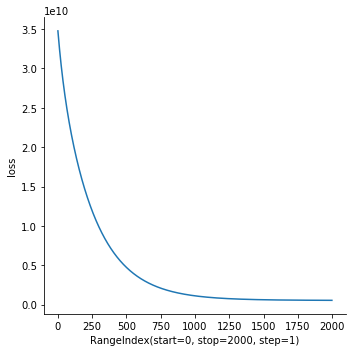

In [83]:
sns.relplot(x=hist.index, y="loss", kind="line", data=hist)

## Prepare for Kaggle submisison

In [84]:
data_test= pd.read_csv('sources/test.csv')

data_test = data_test.select_dtypes(exclude=['object'])
data_test.fillna(0, inplace=True)

X_test = data_test.to_numpy()

print(f"X test {X_test.shape}")

X test (1459, 37)


In [85]:
X_test = scaler.transform(X_test[:,1:37]) # On applique le scaler sur les Surfaces du dataset de test (à l'excepion de l'id#colonne 1)

In [86]:
Y_test = model.predict(x=X_test)
Y_test = np.reshape(Y_test, Y_test.shape[0],)

In [87]:
data_test['Id'] = id_from_data_test
data_test['SalePrice'] = Y_test
data_test.drop(data_test.columns.difference(['Id','SalePrice']), 1, inplace=True)
data_test.to_csv('storage/kaggle_submission_file.csv', index=False)